# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
def roll_dice(times):
    die_result = [1,2,3,4,5,6]
    rolls = []
    for i in range(times):
        rolls.append(random.choice(die_result))
    rolls = pd.DataFrame(rolls)
    rolls = rolls.rename(columns={0:'value'})
    return rolls



In [7]:
rolls = roll_dice(10)
rolls

,value
0,2
1,3
2,4
3,3
4,4
5,3
6,1
7,4
8,5
9,2


#### 2.- Plot the results sorted by value.

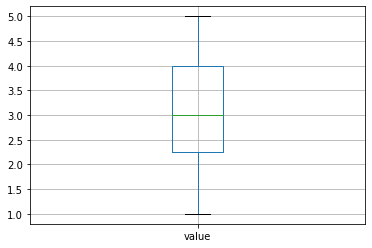

In [8]:
# your code here

rolls.sort_values('value').boxplot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11907f4d0>]],
      dtype=object)

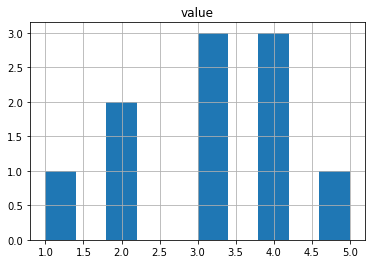

In [9]:
# your code here
rolls.hist()

In [ ]:
"""
The box plot gives us importrant info such as the Median and the IQR and shows if there are any outliers
while the histogram represents the distribution of all data allowing us to quickly identify metrics.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here

def dice_mean(df):
    return (df['value'].sum() / df['value'].count())

dice_mean(rolls)

3.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
rolls["count"] = 1
freq_dist = rolls.groupby("value", as_index= False).count()
freq_dist

,value,count
0,1,1
1,2,2
2,3,3
3,4,3
4,5,1


In [13]:
freq_dist['sum'] = freq_dist['value'] * freq_dist['count']
dice_mean_2 = freq_dist['sum'].sum() / freq_dist['count'].sum()
dice_mean_2

3.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [14]:
results = sorted(list(rolls['value']))
results

[1, 2, 2, 3, 3, 3, 4, 4, 4, 5]

In [15]:
# your code here
results = sorted(list(rolls['value']))

def rolls_median():
    if len(results) % 2 == 0:
        med_1 = results[int(len(results)/2)]
        med_2 = results[int(len(results)/2-1)]
        median = (med_1 + med_2)/2
    else:
        median = results[int(len(results)/2)]
    return median

median = rolls_median()
median

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [16]:
# your code here
def rolls_quartiles(results):
    index = []
    list_length = len(results)

    if list_length % 2 == 0:
        index.append(int(list_length/2)-1)
        index.append(int(list_length/2))
        median = (results[index[0]] + results[index[1]])/2
    else:
        median = results[index[0]]
    return median, index

med_index = rolls_quartiles(results)[1]
q2 = rolls_quartiles(results[:med_index[0]])[0]
q3 = rolls_quartiles(results[med_index[-1]+1:])[0]

print('The first quartile q1 is: ', min(results))
print('The second quartile q2 is: ', q2)
print('The median is: ', median)
print('The third quartile q3 is: ', q3)
print('The fourth quartile q4 is: ', max(results))

The first quartile q1 is:  1
The second quartile q2 is:  2.0
The median is:  3.0
The third quartile q3 is:  4.0
The fourth quartile q4 is:  5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [17]:
# your code here
df_100 = pd.read_csv('/Users/yazanmasarweh/Desktop/IronHack/Bootcamp/Module_2/Labs/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')

In [18]:
df_100['count'] = 1
df_100 = df_100.sort_values('value')
df_100

,Unnamed: 0,roll,value,count
0,0,0,1,1
47,47,47,1,1
56,56,56,1,1
9,9,9,1,1
73,73,73,1,1
...,...,...,...,...
17,17,17,6,1
11,11,11,6,1
24,24,24,6,1
21,21,21,6,1


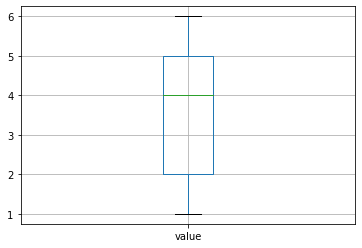

In [19]:
df_100.boxplot('value')

In [ ]:
"""
Mostly higher values are present making the median 4
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [21]:
dice_mean(df_100)

3.74

#### 3.- Now, calculate the frequency distribution.


In [25]:
# your code here
freq_dist_2 = df_100.groupby('value', as_index=False).count()
freq_dist_2

,value,Unnamed: 0,roll,count
0,1,12,12,12
1,2,17,17,17
2,3,14,14,14
3,4,22,22,22
4,5,12,12,12
5,6,23,23,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11958be90>]],
      dtype=object)

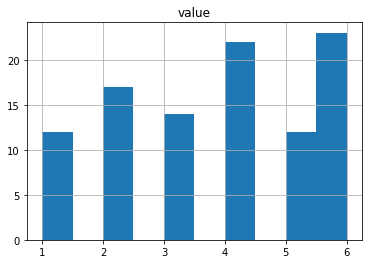

In [26]:
# your code here
df_100.hist('value')

In [ ]:
"""
left skewed value distribution as the median is more than the mean.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [29]:
# your code here
df_1000 = pd.read_csv('/Users/yazanmasarweh/Desktop/IronHack/Bootcamp/Module_2/Labs/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1196a8bd0>]],
      dtype=object)

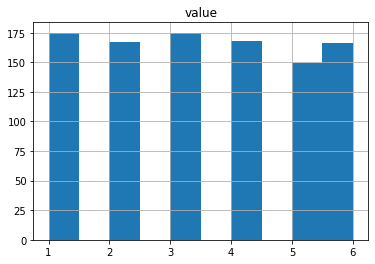

In [30]:
df_1000.hist('value')

In [ ]:
"""
Kind of balances out. they start to have similar counts.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [32]:
# your code here
df_age_1 = pd.read_csv('/Users/yazanmasarweh/Desktop/IronHack/Bootcamp/Module_2/Labs/lab-understanding-descriptive-stats/data/ages_population.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1197e7f50>]],
      dtype=object)

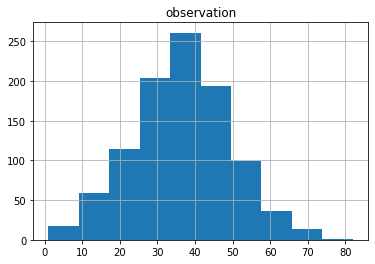

In [33]:
df_age_1.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [34]:
# your code here
mean = np.mean(df_age_1)
mean

observation    36.56
dtype: float64

In [35]:
std = np.std(df_age_1)
std

observation    12.81009
dtype: float64

In [ ]:
"""
Seems to be a normal distribution with an avergae age of 36.5 and a std of alomost 13 years
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [36]:
# your code here
df_age_2 = pd.read_csv('/Users/yazanmasarweh/Desktop/IronHack/Bootcamp/Module_2/Labs/lab-understanding-descriptive-stats/data/ages_population2.csv')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1198e4710>]],
      dtype=object)

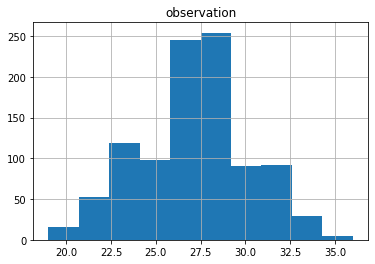

In [37]:
df_age_2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Kind of a normal distribution but with a more centrally contained distribution.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [38]:
# your code here
mean = np.mean(df_age_2)
mean

observation    27.155
dtype: float64

In [39]:
std = np.std(df_age_2)
std

observation    2.968329
dtype: float64

In [ ]:
"""
around 70% of the sample is within 3 years of 27.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [41]:
# your code here
df_age_3 = pd.read_csv('/Users/yazanmasarweh/Desktop/IronHack/Bootcamp/Module_2/Labs/lab-understanding-descriptive-stats/data/ages_population3.csv')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1199afa50>]],
      dtype=object)

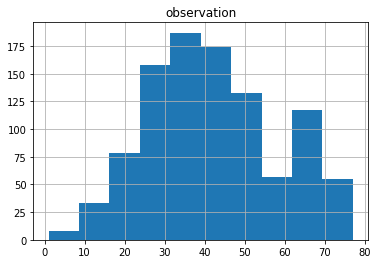

In [42]:
df_age_3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [43]:
# your code here
mean = np.mean(df_age_3)
mean

observation    41.989
dtype: float64

In [44]:
std = np.std(df_age_3)
std

observation    16.136632
dtype: float64

In [ ]:
"""
There seems to be outliers affecting the distribution of age making the mean and std higher.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [45]:
# your code here
df_age_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
Around 2 year difference between the mean and median. Which would suggest that there is indeed outliers since the std is quite high.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [48]:
# your code here
df_age_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
75% of all data is below the age of 53 yet with the
mean being around 42 and the std being 16 it reaffirms the reasoining that outliers
are existing above the 75% of the age group.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""